In [31]:
# Imports 
import random 
import names
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Creating the simulation dataset

In [201]:
df = pd.DataFrame() 
random.seed(1)

In [202]:
sample_id = []

for i in range(0,500):
    sample = ("A001_0" + str(i))
    sample_id.append(sample)  
    
df["sample_id"] = sample_id

In [203]:
genders = ["Male", "Female"]
Gender = random.choices(genders, k = 500)
df['gender'] = Gender

In [204]:
first_name = []

for i in df['gender']:
    if i == "Male":
        rand_name = names.get_first_name(gender='male')
        
    else:
        rand_name = names.get_first_name(gender='female')
        
    first_name.append(rand_name)
    
df['first_name'] = first_name

In [205]:
last_name = []

for i in range(500):
        rand_name = names.get_last_name()
        last_name.append(rand_name)
        
df['last_name'] = last_name

In [206]:
age_list = []

for i in range(0, 500):
    n = random.randint(20, 79)
    age_list.append(n)
    
df['age'] = age_list
df

,sample_id,gender,first_name,last_name,age
0,A001_00,Male,Douglas,Kemp,75
1,A001_01,Female,Evelyn,Baker,71
2,A001_02,Female,Sheila,Long,33
3,A001_03,Male,James,Keene,72
4,A001_04,Male,Eric,Wheatley,54
...,...,...,...,...,...
495,A001_0495,Female,Maggie,Ford,43
496,A001_0496,Male,Cody,Austin,46
497,A001_0497,Female,Cynthia,Barlow,49
498,A001_0498,Female,Pamela,Ketcham,43


In [207]:
bmi_list = []
height_list = []

# https://asbmr.onlinelibrary.wiley.com/doi/full/10.1002/jbm4.10358

for i in range(500):
    gender = random.randint(0,1)
    weight = np.random.normal(85.93 if gender == 0 else 71.46, 
                          14.37 if gender == 0 else 14.09)
    height = np.random.normal(176 if gender == 0 else 162,
                          0.68 if gender == 0 else 0.63)
    bmi = weight / ((height/100)**2)
    bmi_list.append(np.round(bmi, 2))
    height_list.append(np.round(height, 2))

df['BMI'] = bmi_list
df['height'] = height_list
df

,sample_id,gender,first_name,last_name,age,BMI,height
0,A001_00,Male,Douglas,Kemp,75,20.67,161.45
1,A001_01,Female,Evelyn,Baker,71,33.67,162.03
2,A001_02,Female,Sheila,Long,33,34.61,162.35
3,A001_03,Male,James,Keene,72,32.82,175.26
4,A001_04,Male,Eric,Wheatley,54,19.18,162.62
...,...,...,...,...,...,...,...
495,A001_0495,Female,Maggie,Ford,43,30.61,177.35
496,A001_0496,Male,Cody,Austin,46,24.07,175.30
497,A001_0497,Female,Cynthia,Barlow,49,22.01,176.07
498,A001_0498,Female,Pamela,Ketcham,43,28.98,177.28


In [208]:
country_data = pd.read_csv("/Users/tina/Desktop/simulation /country-capitals/data/country-list.csv")
country_data = country_data.drop(country_data.columns[2], axis =1)
sample = country_data.sample(n=500, replace = True)
sample = sample.reset_index(drop=True)

df = pd.concat([df,sample],axis=1)

In [210]:
edu_dict = {'education': ["primary", "high school", "bachelor", "master", "phD"]}
education_levels = pd.DataFrame(edu_dict)
education_sample = education_levels.sample(n=500, replace = True)
education_sample = education_sample.reset_index(drop=True)

df = pd.concat([df,education_sample],axis=1)

In [212]:
list_gene = ['gene_exp_val_1','gene_exp_val_2','gene_exp_val_3','gene_exp_val_4','gene_exp_val_5','gene_exp_val_6','gene_exp_val_7','gene_exp_val_8','gene_exp_val_9','gene_exp_val_10']
for index in range(0,10):
    gene_list = [None] * 500
    for i in range(0,500):
        gene_mean = random.randint(2,8)
        gene_std = random.randint(10,20)/10
        gene_expr = np.random.normal(gene_mean, gene_std)
        gene_list[i] = gene_expr
    df[list_gene[index]] = gene_list

In [213]:
list_SNP = [0,1,2]
SNP1 = random.choices(list_SNP,k=500)
SNP2 = random.choices(list_SNP,k=500)
SNP3 = random.choices(list_SNP,k=500)
SNP4 = random.choices(list_SNP,k=500)
SNP5 = random.choices(list_SNP,k=500)

# dict = {'SNP1': SNP1, 'SNP2': SNP2, 'SNP3': SNP3, 'SNP4':SNP4, 'SNP5':SNP5} 
df['SNP1'] = SNP1
df['SNP2'] = SNP2
df['SNP3'] = SNP3
df['SNP4'] = SNP4
df['SNP5'] = SNP5

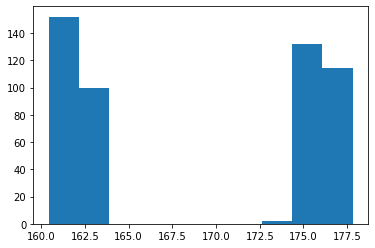

In [216]:
plt.hist(df['height'])
plt.show()